In [56]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [57]:
gt = cv2.imread('0000_gt.jpg', 1)
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
gt_grey = cv2.imread('0000_gt.jpg', 0)
dft_gt = cv2.dft(np.float32(gt_grey),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift_gt = np.fft.fftshift(dft_gt)
magnitude_spectrum_gt = 20*np.log(cv2.magnitude(dft_shift_gt[:,:,0],dft_shift_gt[:,:,1]))

In [58]:
img = cv2.imread('0000_moire.jpg', 1)
img_grey = cv2.imread('0000_moire.jpg', 0)
dft_img = cv2.dft(np.float32(img_grey),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift_img = np.fft.fftshift(dft_img)
magnitude_spectrum_img = 20*np.log(cv2.magnitude(dft_shift_img[:,:,0],dft_shift_img[:,:,1]))

In [59]:
rows, cols = img.shape[:2]
crow,ccol = rows//2 , cols//2

In [60]:
blue, green, red = cv2.split(img)

In [62]:
dft_red = cv2.dft(np.float32(red),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_red = np.fft.fftshift(dft_red)
magnitude_spectrum_red = 20*np.log(cv2.magnitude(dft_shift_red[:,:,0],dft_shift_red[:,:,1]))

d = 100
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1
# apply mask and inverse DFT
fshift_red = dft_shift_red*mask
f_ishift_red = np.fft.ifftshift(fshift_red)
img_back_red = cv2.idft(f_ishift_red)
img_back_red = cv2.magnitude(img_back_red[:,:,0],img_back_red[:,:,1])

In [63]:
dft_green = cv2.dft(np.float32(green),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_green = np.fft.fftshift(dft_green)
magnitude_spectrum_green = 20*np.log(cv2.magnitude(dft_shift_green[:,:,0],dft_shift_green[:,:,1]))

d = 100
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1
# apply mask and inverse DFT
fshift_green = dft_shift_green*mask
f_ishift_green = np.fft.ifftshift(fshift_green)
img_back_green = cv2.idft(f_ishift_green)
img_back_green = cv2.magnitude(img_back_green[:,:,0],img_back_green[:,:,1])

In [64]:
dft_blue = cv2.dft(np.float32(blue),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_blue = np.fft.fftshift(dft_blue)
magnitude_spectrum_blue = 20*np.log(cv2.magnitude(dft_shift_blue[:,:,0],dft_shift_blue[:,:,1]))

d = 100
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1
# apply mask and inverse DFT
fshift_blue = dft_shift_blue*mask
f_ishift_blue = np.fft.ifftshift(fshift_blue)
img_back_blue = cv2.idft(f_ishift_blue)
img_back_blue = cv2.magnitude(img_back_blue[:,:,0],img_back_blue[:,:,1])

In [65]:
img_back = cv2.merge((img_back_red, img_back_green, img_back_blue))

In [66]:
img_back_gray = cv2.cvtColor(img_back, cv2.COLOR_RGB2GRAY)

In [73]:
img_back = img_back / img_back.max()

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [67]:
dft_back = cv2.dft(np.float32(img_back_gray),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift_back = np.fft.fftshift(dft_back)
magnitude_spectrum_back = 20*np.log(cv2.magnitude(dft_shift_back[:,:,0],dft_shift_back[:,:,1]))

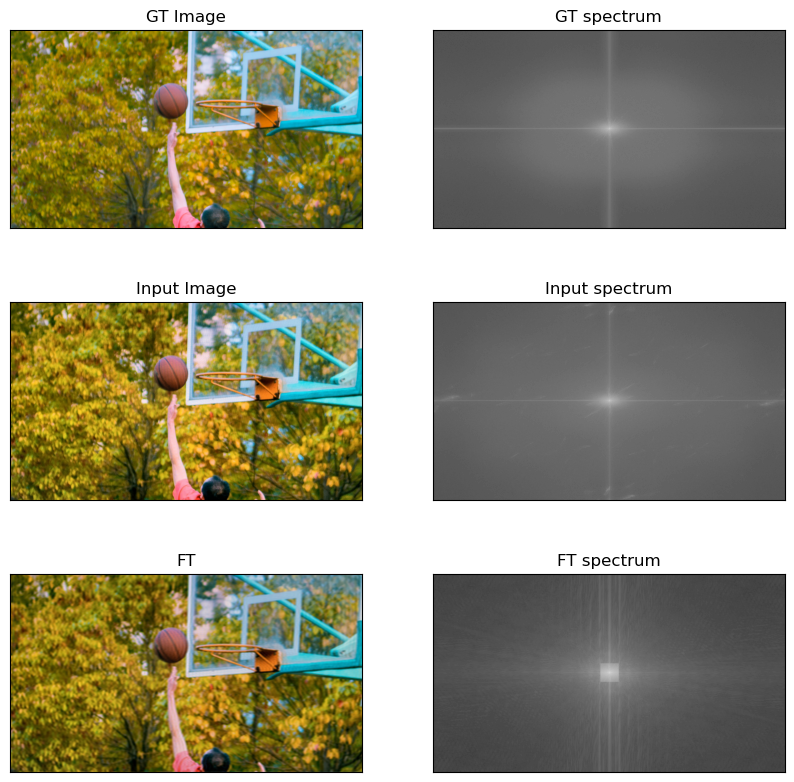

In [74]:
plt.figure(figsize=(10, 10))
plt.subplot(321),plt.imshow(gt)
plt.title('GT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum_gt, cmap = 'gray')
plt.title('GT spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(magnitude_spectrum_img, cmap = 'gray')
plt.title('Input spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back)
plt.title('FT'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(magnitude_spectrum_back, cmap = 'gray')
plt.title('FT spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [76]:
plt.imsave('0000_ft.jpg', img_back)

----------------------------

In [32]:
gt = cv2.imread('0000_gt.jpg', 0)
dft_gt = cv2.dft(np.float32(gt),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift_gt = np.fft.fftshift(dft_gt)
magnitude_spectrum_gt = 20*np.log(cv2.magnitude(dft_shift_gt[:,:,0],dft_shift_gt[:,:,1]))


img = cv2.imread('0000_moire.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# 아래는 d 사이지의 사각형을 생성한 후, 사각형 바깥쪽을 제거하는 형태임.
# 즉, 고주파영역을 제거하게 됨.
# d값이 작을수록 사각형이 작고, 바깥영역 즉, 고주파영역이  많이 제거되기 때문에 이미지가 뭉게지고
# d값이 클수록 사각형이 크고, 바깥영역 즉, 고주파 영역이 적게 제거되기 때문에 원래 이미지와 가까워짐.


In [33]:

d = 100
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


In [36]:

dft_back = cv2.dft(np.float32(img_back),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
magnitude_spectrum_back = 20*np.log(cv2.magnitude(dft_shift_back[:,:,0],dft_shift_back[:,:,1]))
# gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_back = cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB)


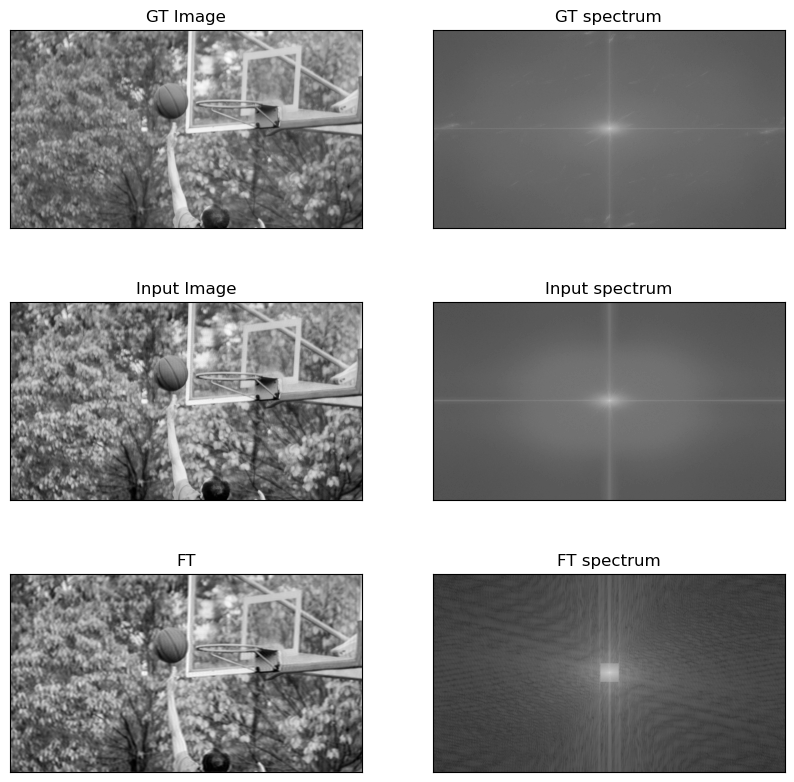

In [37]:

plt.figure(figsize=(10, 10))
plt.subplot(321),plt.imshow(gt, cmap = 'gray')
plt.title('GT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('GT spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(magnitude_spectrum_gt, cmap = 'gray')
plt.title('Input spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back, cmap = 'gray')
plt.title('FT'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(magnitude_spectrum_back, cmap = 'gray')
plt.title('FT spectrum'), plt.xticks([]), plt.yticks([])
plt.show()